In [2]:
import sys
import os
from pathlib import Path

# Add the project root to Python path
cwd = os.getcwd()
print(cwd)
project_root = Path(cwd).parent  # Go up to project root
# Sys.path is a list of dirs that python searches through for importing modules and files
# I'm adding the root to the path so the file can import things as if it were running from root
# This way I can keep my tests organized, but it still acts like I'm running from root
sys.path.insert(0, str(project_root))

from jsbgym.control_system.ha_flight_evals import *
from jsbgym.aircraft import *
import jsbgym.properties as prp
from jsbgym.control_system.ha_flight_pid import *

d:\1DrvTK\OneDrive\GitHub\ADMBenchmark\control_system_evaluations


Engines set to running!


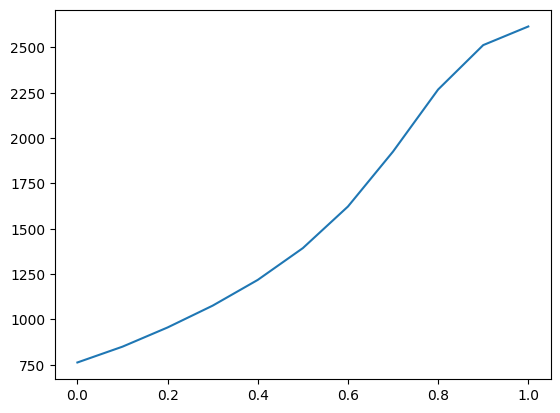

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[763, 850, 956, 1076, 1218, 1393, 1623, 1926, 2268, 2513, 2615]


In [20]:
sim = SimulationInterface(initial_conditions={
    prp.initial_altitude_agl_ft: 0,
    prp.initial_u_fps: 0,
})
sim.initialize()


throttles = []
rpms = []
# Run for 60s
for throttle_cmd in range(0, 11):
    throttle_cmd /= 10
    avg_rpm = 0
    for i in range(300):
        sim.step({prp.throttle_cmd: throttle_cmd})
        # let it stabilize for 10s
        if i > 50:
            avg_rpm += sim.get_property(prp.propeller_rpm)

    avg_rpm /= 250
    throttles.append(throttle_cmd)
    rpms.append(avg_rpm)

import matplotlib.pyplot as plt

plt.plot(throttles, rpms)
plt.show()
print(throttles)
print([round(i) for i in rpms])
